In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from labellines import labelLine, labelLines
from matplotlib.pyplot import cm
from importlib import reload

import src.utils as utils

seedno = 123
rng = np.random.default_rng(seed=seedno)

In [2]:
reload(utils)

<module 'src.utils' from '/Users/leandrosb/Documents/GitHub/AMM/src/utils.py'>

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"
plt.rc("text", usetex = True)
plt.rc("text.latex", preamble=r'\usepackage{amsmath,amsfonts}')
fs = 16
dpi = 300

In [4]:
y_0 = 1_000
Z_0 = 100.
depth = (Z_0*y_0)*(y_0)

In [17]:
y_grid = np.array([i for i in range(y_0-20,y_0+20)])
np.mean(np.diff(y_grid))

import pickle

params = { "int_sell": 10., "int_buy": 10., "kappa": 1./np.mean(np.diff(y_grid)), "oracleprice": 100., "depth": depth, "y_grid": y_grid, "y_0": y_0, "T": 1., "pen_const": 0.,}

with open("src/params.pkl", "wb") as f:pickle.dump(params,f)

import pickle

with open('src/params.pkl', 'rb') as f:
    params = pickle.load(f)

In [18]:
AMM = utils.AMM(**params)

In [19]:
(cash, y_quantity, n_sell_order, n_buy_order), (cash_bench, y_quantity_bench, n_sell_order_bench, n_buy_order_bench) = AMM.simulate_PnL(nsims = 100_000, Nt =1_000, benchmarks = True)

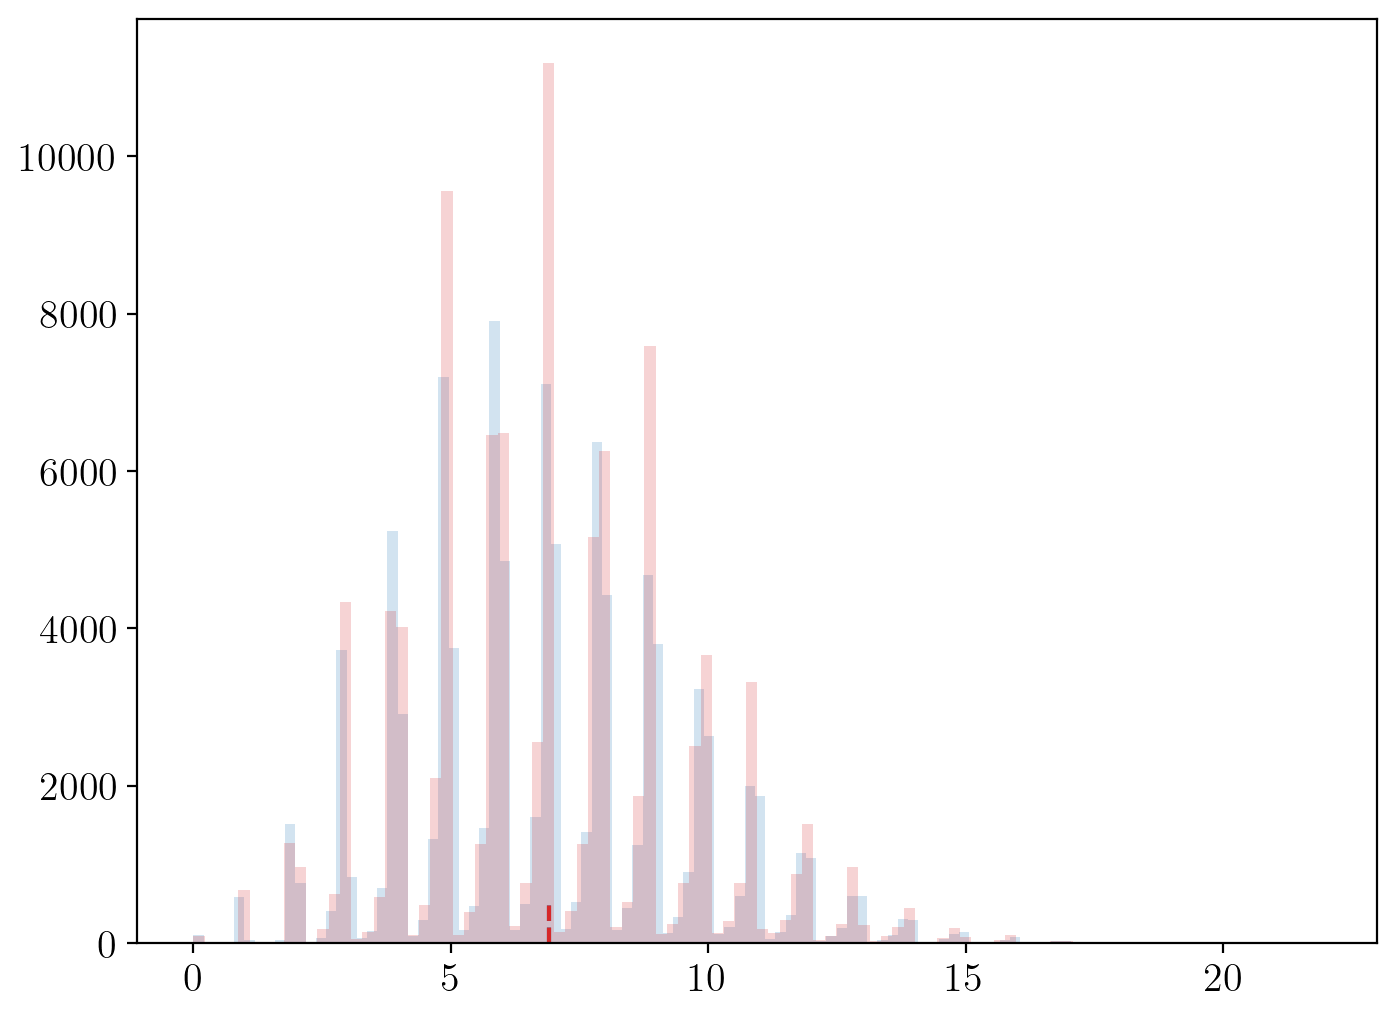

In [23]:
plt.hist(cash, bins = 100, alpha = 0.2, color = 'tab:blue')
plt.vlines(x = np.mean(cash), ymin=0,ymax=500, color='tab:blue', linestyles='--')
plt.hist(cash_bench, bins = 100,alpha = 0.2, color = 'tab:red')
plt.vlines(x = np.mean(cash_bench), ymin=0,ymax=500, color='tab:red', linestyles='--')
#plt.xlim([6,7])
plt.show()

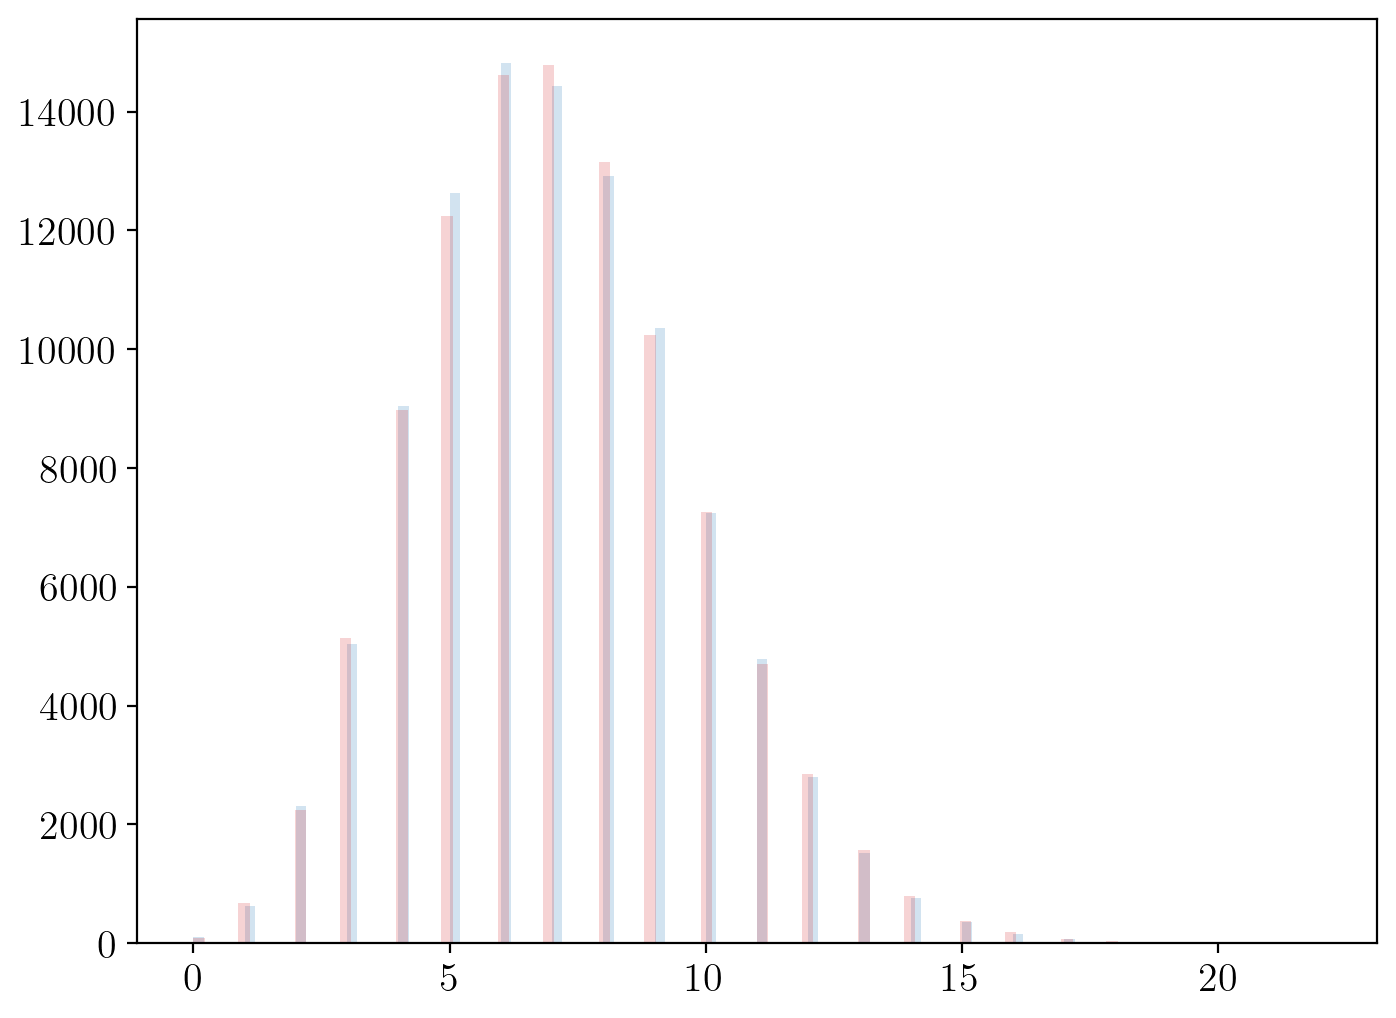

In [21]:
plt.hist(n_sell_order+n_buy_order, bins = 100, alpha = 0.2, color = 'tab:blue')
plt.hist(n_sell_order_bench+n_buy_order_bench, bins = 100,alpha = 0.2, color = 'tab:red')
plt.show()